In [3]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

/opt/miniconda3/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
# pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [4]:
import seaborn as sns

# sns barplots

In [5]:
df_DA_US = df[(df.job_title_short=='Data Analyst')
              & (df.job_country=='United States')].copy()

In [6]:
df_DA_US.dropna(subset = ['salary_year_avg'], inplace=True)

In [7]:
df_exploded = df_DA_US[['salary_year_avg', 'job_skills']].explode('job_skills')

In [8]:
in_demand_skills = df_exploded.job_skills.value_counts().sort_values(ascending = False).head(10).index

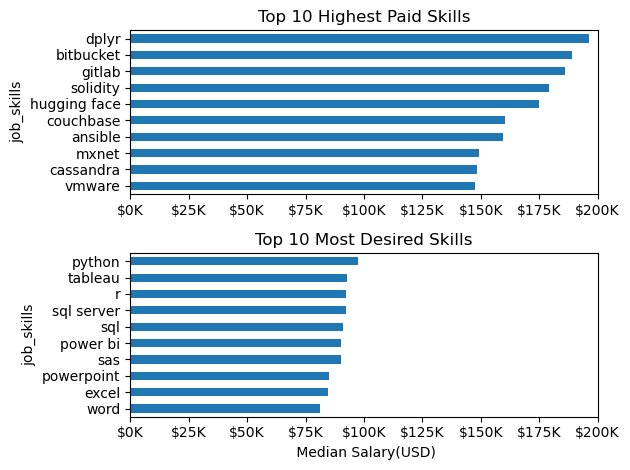

In [9]:
fig, ax = plt.subplots(2, 1)

df_exploded.groupby(by = 'job_skills').salary_year_avg.median().sort_values(ascending= False).head(10).plot(kind = 'barh', ax = ax[0])
ax[0].set_xlim(0,200_000)
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))
ax[0].invert_yaxis()
ax[0].set_title('Top 10 Highest Paid Skills')

df_exploded[df_exploded.job_skills.isin(in_demand_skills)].groupby(by = 'job_skills').salary_year_avg.median().sort_values(ascending= False).head(10).plot(kind = 'barh', ax = ax[1])
ax[1].set_xlim(0,200_000)
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))
ax[1].invert_yaxis()
ax[1].set_xlabel(' Median Salary(USD)')
ax[1].set_title('Top 10 Most Desired Skills')


fig.tight_layout()
plt.show()

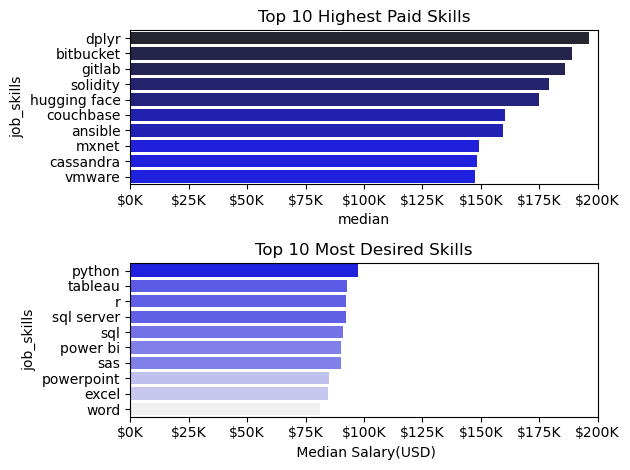

In [25]:
fig, ax = plt.subplots(2, 1)

# df_exploded.groupby(by = 'job_skills').salary_year_avg.median().sort_values(ascending= False).head(10).plot(kind = 'barh', ax = ax[0])
df_top_pay = df_exploded.groupby(by = 'job_skills').salary_year_avg.median().sort_values(ascending= False).head(10).reset_index(name = 'median')

sns.barplot(data = df_top_pay, x = 'median', y = 'job_skills', ax = ax[0], hue = 'median', palette= 'dark:b_r')

ax[0].set_xlim(0,200_000)
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))
# ax[0].invert_yaxis()
ax[0].set_title('Top 10 Highest Paid Skills')
ax[0].legend().remove()

# df_exploded[df_exploded.job_skills.isin(in_demand_skills)].groupby(by = 'job_skills').salary_year_avg.median().sort_values(ascending= False).head(10).plot(kind = 'barh', ax = ax[1])
df_most_skills = df_exploded[df_exploded.job_skills.isin(in_demand_skills)].groupby(by = 'job_skills').salary_year_avg.median().sort_values(ascending= False).head(10).reset_index(name = 'median')

sns.barplot(data = df_most_skills, x = 'median', y = 'job_skills', ax = ax[1], hue = 'median', palette= 'light:b')

ax[1].set_xlim(0,200_000)
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))
# ax[1].invert_yaxis()
ax[1].set_xlabel(' Median Salary(USD)')
ax[1].set_title('Top 10 Most Desired Skills')
ax[1].legend().remove()


fig.tight_layout()
plt.show()

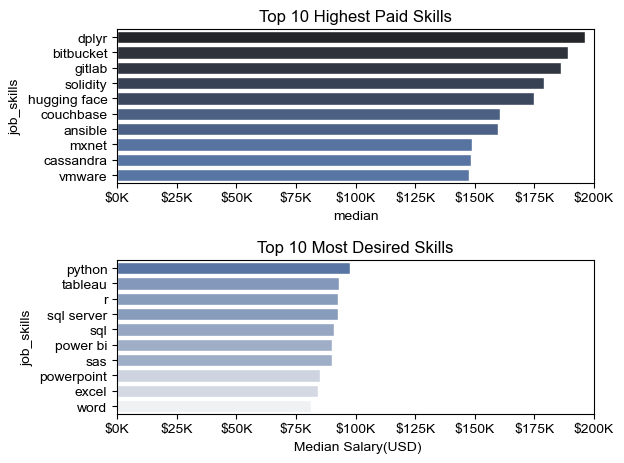

In [26]:
fig, ax = plt.subplots(2, 1)
sns.set_theme(style="ticks")

# df_exploded.groupby(by = 'job_skills').salary_year_avg.median().sort_values(ascending= False).head(10).plot(kind = 'barh', ax = ax[0])
df_top_pay = df_exploded.groupby(by = 'job_skills').salary_year_avg.median().sort_values(ascending= False).head(10).reset_index(name = 'median')

sns.barplot(data = df_top_pay, x = 'median', y = 'job_skills', ax = ax[0], hue = 'median', palette= 'dark:b_r')

ax[0].set_xlim(0,200_000)
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))
# ax[0].invert_yaxis()
ax[0].set_title('Top 10 Highest Paid Skills')
ax[0].legend().remove()

# df_exploded[df_exploded.job_skills.isin(in_demand_skills)].groupby(by = 'job_skills').salary_year_avg.median().sort_values(ascending= False).head(10).plot(kind = 'barh', ax = ax[1])
df_most_skills = df_exploded[df_exploded.job_skills.isin(in_demand_skills)].groupby(by = 'job_skills').salary_year_avg.median().sort_values(ascending= False).head(10).reset_index(name = 'median')

sns.barplot(data = df_most_skills, x = 'median', y = 'job_skills', ax = ax[1], hue = 'median', palette= 'light:b')

ax[1].set_xlim(0,200_000)
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))
# ax[1].invert_yaxis()
ax[1].set_xlabel(' Median Salary(USD)')
ax[1].set_title('Top 10 Most Desired Skills')
ax[1].legend().remove()


fig.tight_layout()
plt.show()

In [16]:
df_most_skills = df_exploded[df_exploded.job_skills.isin(in_demand_skills)].groupby(by = 'job_skills').salary_year_avg.median().sort_values(ascending= False).head(10).reset_index(name = 'median')

In [17]:
df_most_skills

,job_skills,median
0,python,97500.00
1,tableau,92875.00
2,r,92500.00
3,sql server,92500.00
4,sql,91000.00
5,power bi,90000.00
6,sas,90000.00
7,powerpoint,85000.00
8,excel,84392.00
9,word,81194.75


# sns histograms

In [27]:
df_DA_US = df[
    (df.job_country == 'United States') 
    & (df.job_title_short == 'Data Analyst')].copy()

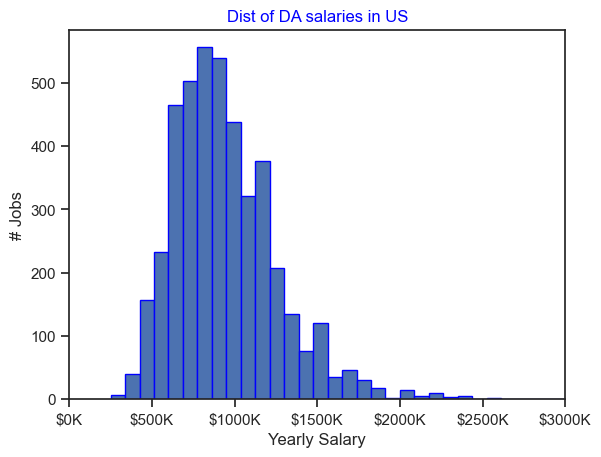

In [28]:
df_DA_US.salary_year_avg.plot(kind = 'hist', bins = 40, edgecolor = 'blue')

ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/100)}K')) # adding formatting to x values

plt.xlim(0, 300_000)
plt.title('Dist of DA salaries in US', color = 'blue')
plt.ylabel('# Jobs')
plt.xlabel('Yearly Salary')


plt.show()

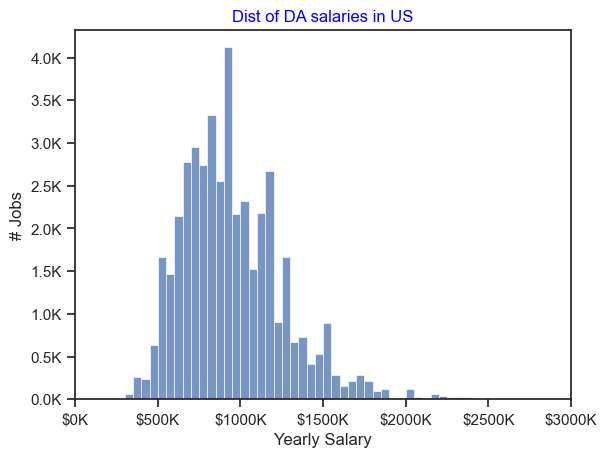

In [ ]:
sns.histplot(data = df_DA_US, x = 'salary_year_avg')

ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/100)}K')) # adding formatting to x values
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{float(y/100):.1f}K')) # adding formatting to x values

plt.xlim(0, 300_000)
plt.title('Dist of DA salaries in US', color = 'blue')
plt.ylabel('# Jobs')
plt.xlabel('Yearly Salary')


plt.show()

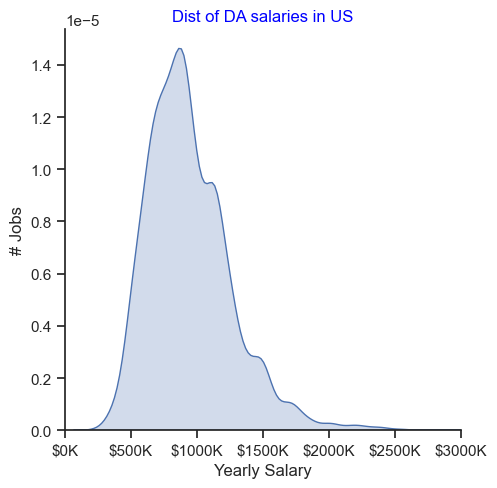

In [39]:
sns.displot(data = df_DA_US, x = 'salary_year_avg', kind = 'kde', fill = True)

ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/100)}K')) # adding formatting to x values

plt.xlim(0, 300_000)
plt.title('Dist of DA salaries in US', color = 'blue')
plt.ylabel('# Jobs')
plt.xlabel('Yearly Salary')


plt.show()

# sns boxplot

/var/folders/k3/cbzsw7nn0qj318bffqlxc1000000gn/T/ipykernel_17673/1456016140.py:9: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(job_list, labels = job_titles, vert = False)


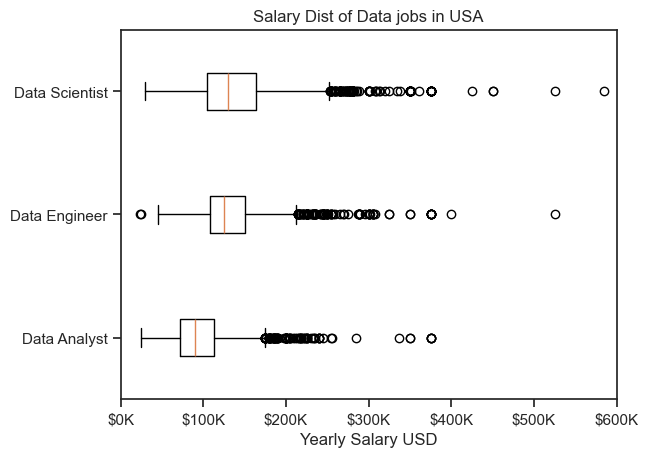

In [41]:
job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']

df_USA = df[(df.job_country == 'United States') & df.job_title_short.isin(job_titles)].copy()
df_USA.dropna(subset=['salary_year_avg'], inplace = True)

job_list = [df_USA[df_USA.job_title_short == job_title].salary_year_avg for job_title in job_titles]


plt.boxplot(job_list, labels = job_titles, vert = False)

plt.title('Salary Dist of Data jobs in USA')
plt.xlabel('Yearly Salary USD')

ax = plt.gca() # gca = get current axis
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))
plt.xlim(0,600_000)

plt.show()

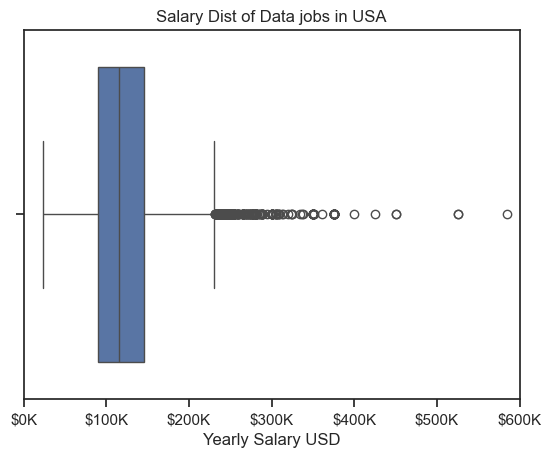

In [42]:
# plt.boxplot(job_list, labels = job_titles, vert = False)

sns.boxplot(data = df_USA, x ='salary_year_avg')

plt.title('Salary Dist of Data jobs in USA')
plt.xlabel('Yearly Salary USD')

ax = plt.gca() # gca = get current axis
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))
plt.xlim(0,600_000)

plt.show()

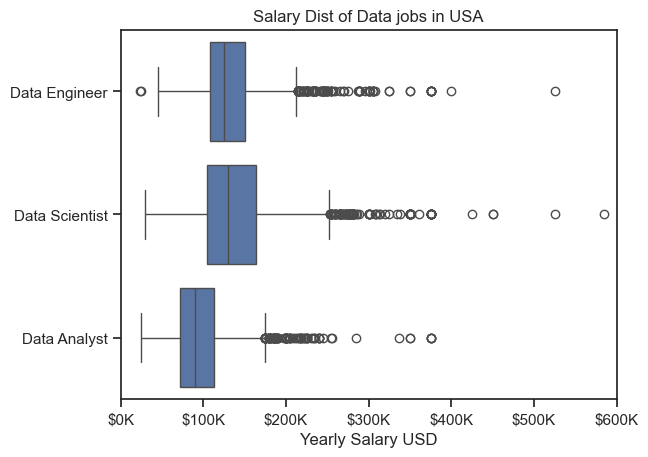

In [45]:
sns.boxplot(data = df_USA, x ='salary_year_avg', y = 'job_title_short')

plt.title('Salary Dist of Data jobs in USA')
plt.xlabel('Yearly Salary USD')
plt.ylabel('')

ax = plt.gca() # gca = get current axis
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))
plt.xlim(0,600_000)

plt.show()

In [46]:
df_USA.head()

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
92,Data Engineer,Remote - Data Engineer - Permanent - W2,Anywhere,via LinkedIn,Full-time,True,"Illinois, United States",2023-02-21 13:29:59,False,True,United States,year,120000.0,NaN,Apex Systems,"[sql, python]","{'programming': ['sql', 'python']}"
100,Data Scientist,"Data Scientist, Risk Data Mining - USDS","Mountain View, CA",via LinkedIn,Full-time,False,"California, United States",2023-07-31 13:01:18,False,True,United States,year,228222.0,NaN,TikTok,"[sql, r, python, express]","{'programming': ['sql', 'r', 'python'], 'webfr..."
109,Data Analyst,Senior Supply Chain Analytics Analyst,Anywhere,via Get.It,Full-time,True,"Illinois, United States",2023-10-12 13:02:19,False,True,United States,year,89000.0,NaN,Get It Recruit - Transportation,"[python, r, alteryx, tableau]","{'analyst_tools': ['alteryx', 'tableau'], 'pro..."
116,Data Scientist,Data Scientist,Anywhere,via LinkedIn,Full-time,True,"Texas, United States",2023-10-04 13:04:23,False,False,United States,year,114000.0,NaN,4 Corner Resources,"[r, python, sql, t-sql, hadoop, spark, tableau]","{'analyst_tools': ['tableau'], 'libraries': ['..."
146,Data Engineer,Data Engineer Graduate (Real Time Communicatio...,"Seattle, WA",via LinkedIn,Full-time,False,"California, United States",2023-10-21 13:06:16,False,True,United States,year,129500.0,NaN,ByteDance,"[golang, scala, python, java, hadoop, spark]","{'libraries': ['hadoop', 'spark'], 'programmin..."


In [53]:
df_top_companies = df_USA[df_USA.job_title_short=='Data Scientist'].groupby(by = 'company_name').agg(
    median_salary = ('salary_year_avg', 'median')
).sort_values(by = 'median_salary', ascending= False).head(5)

<Axes: xlabel='median_salary', ylabel='company_name'>

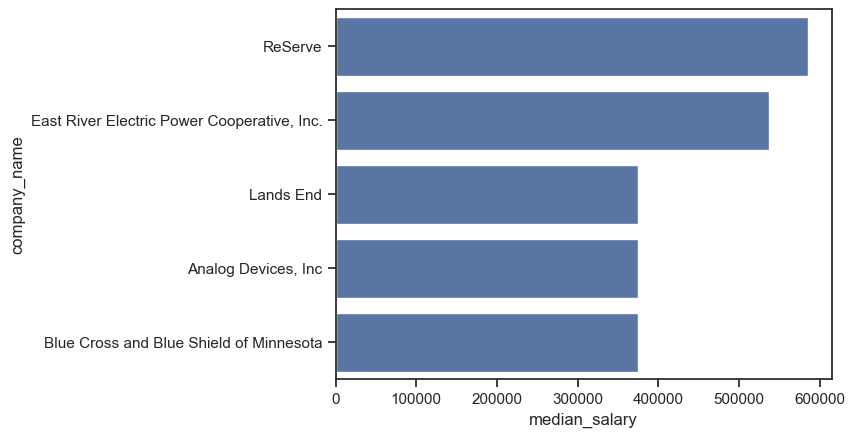

In [56]:
sns.barplot(data = df_top_companies, y = df_top_companies.index, x = 'median_salary')

In [58]:
df_DS_USA = df_USA[df_USA.job_title_short=='Data Scientist'].dropna(subset = 'salary_year_avg').copy()

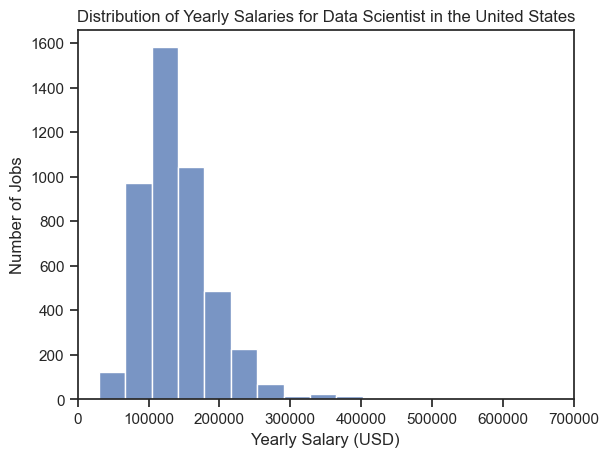

In [67]:
sns.histplot(data = df_DS_USA, x = 'salary_year_avg', bins = 25)
plt.xlim(0,700_000)
plt.title('Distribution of Yearly Salaries for Data Scientist in the United States')
plt.xlabel('Yearly Salary (USD)')
plt.ylabel('Number of Jobs')
plt.show()

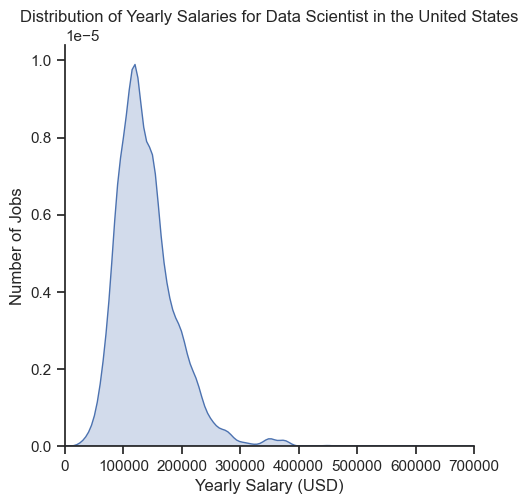

In [69]:
sns.displot(data = df_DS_USA, x = 'salary_year_avg', kind = 'kde', fill = True)
plt.xlim(0,700_000)
plt.title('Distribution of Yearly Salaries for Data Scientist in the United States')
plt.xlabel('Yearly Salary (USD)')
plt.ylabel('Number of Jobs')
plt.show()

In [70]:
job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']

In [71]:
df_IND = df[(df.job_country=='India') 
            & df.job_title_short.isin(job_titles)].dropna(subset=['salary_year_avg']).copy()

In [72]:
df_IND.head()

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
2022,Data Engineer,Data Engineer - SQL (Power BI),India,via Ai-Jobs.net,Full-time,False,India,2023-10-31 13:09:54,False,False,India,year,156500.0,NaN,Gartner,"[java, t-sql, sql, azure, power bi, dax, notion]","{'analyst_tools': ['power bi', 'dax'], 'async'..."
2785,Data Engineer,Staff Software Engineer - Data Engineering (Ja...,"Bengaluru, Karnataka, India",via Ai-Jobs.net,Full-time,False,India,2023-05-26 13:13:28,False,False,India,year,147500.0,NaN,Zscaler,"[java, nosql, neo4j, redshift, aws, spring, sp...","{'analyst_tools': ['excel'], 'cloud': ['redshi..."
3930,Data Scientist,Lead Data Scientist,"Bengaluru, Karnataka, India",via Ai-Jobs.net,Full-time,False,India,2023-12-12 13:27:33,False,False,India,year,114516.0,NaN,Boeing,"[python, r, c++, tensorflow, tableau]","{'analyst_tools': ['tableau'], 'libraries': ['..."
7946,Data Engineer,Data Engineering Manager,"Mysuru, Karnataka, India",via Ai-Jobs.net,Full-time,False,India,2023-07-28 13:10:54,False,False,India,year,147500.0,NaN,66degrees,"[sql, gcp, bigquery]","{'cloud': ['gcp', 'bigquery'], 'programming': ..."
9143,Data Scientist,Manager - Data Science,"Bengaluru, Karnataka, India",via Ai-Jobs.net,Full-time,False,India,2023-05-12 13:28:49,False,False,India,year,79200.0,NaN,BitGo,"[sql, tableau]","{'analyst_tools': ['tableau'], 'programming': ..."


(0.0, 300000.0)

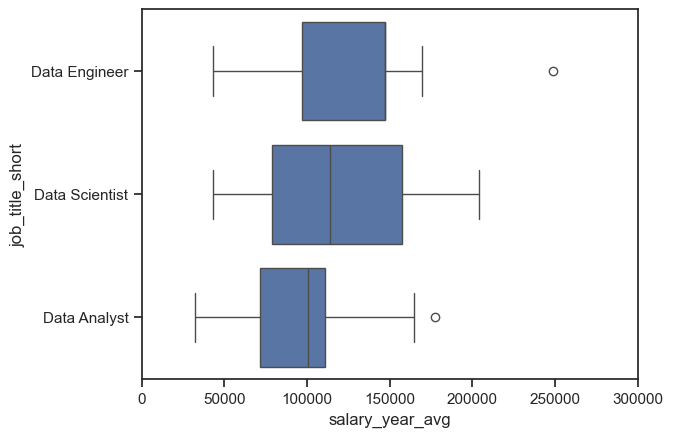

In [77]:
sns.boxplot(data = df_IND, x = 'salary_year_avg', y = 'job_title_short')
plt.xlim(0,300_000)

In [78]:
df_DS_USA.head()

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
100,Data Scientist,"Data Scientist, Risk Data Mining - USDS","Mountain View, CA",via LinkedIn,Full-time,False,"California, United States",2023-07-31 13:01:18,False,True,United States,year,228222.0,NaN,TikTok,"[sql, r, python, express]","{'programming': ['sql', 'r', 'python'], 'webfr..."
116,Data Scientist,Data Scientist,Anywhere,via LinkedIn,Full-time,True,"Texas, United States",2023-10-04 13:04:23,False,False,United States,year,114000.0,NaN,4 Corner Resources,"[r, python, sql, t-sql, hadoop, spark, tableau]","{'analyst_tools': ['tableau'], 'libraries': ['..."
257,Data Scientist,Senior Bioinformatics Research Scientist- Data...,"Brighton, TN",via Work RN,Full-time,False,Georgia,2023-11-20 13:40:09,False,False,United States,year,103128.0,NaN,St. Jude Children's Research Hospital,"[r, electron]","{'libraries': ['electron'], 'programming': ['r']}"
450,Data Scientist,Data Defense Developer - USDS,"Mountain View, CA",via LinkedIn,Full-time,False,"New York, United States",2023-12-02 13:19:59,False,True,United States,year,157500.0,NaN,TikTok,"[go, python, java, mongo, redis, aws, pandas, ...","{'cloud': ['aws'], 'databases': ['redis'], 'li..."
1257,Data Scientist,Data Scientist,"Minneapolis, MN",via Adzuna,Full-time,False,"Illinois, United States",2023-02-21 13:25:40,False,True,United States,year,70700.0,NaN,Target,"[java, scala, python, r, kotlin, sql, spark]","{'libraries': ['spark'], 'programming': ['java..."


<Axes: xlabel='job_no_degree_mention', ylabel='salary_year_avg'>

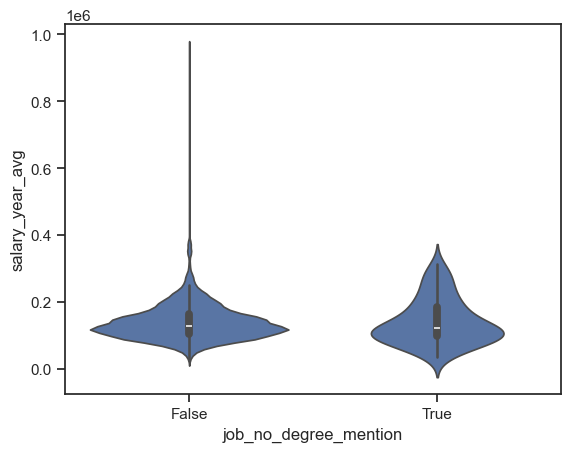

In [82]:
sns.violinplot(data = df_DS_USA, y = 'salary_year_avg', x = 'job_no_degree_mention')